# Практическая работа №7. Библиотека SymPy

In [2]:
import sympy as sym

### Задание №1. Создание выражения

#### Создайте выражение:

$$f = x e^{-x} + x (1-x)$$

#### Затем вычислите его для

$$x = 0, 0.1, 0.2, 0.4, 0.8$$

- Выведите выражение:

In [3]:
from sympy import symbols, E

x = symbols('x')
expr = x * (E ** -x) + x * (1 - x)
display(expr)

x*(1 - x) + x*exp(-x)

- Выведите ответ:

In [4]:
iters = [0, 0.1, 0.2, 0.4, 0.8]
for i in iters:
  result = expr.subs({x: i})
  print(f'При x = {i}, f = {result}')

При x = 0, f = 0
При x = 0.1, f = 0.180483741803596
При x = 0.2, f = 0.323746150615596
При x = 0.4, f = 0.508128018414256
При x = 0.8, f = 0.519463171293777


### Задание №2. Факторизация* полинома и нахождение его корней

#### Факторизуйте:

$$x^{4} - 6 x^{3} + x^{2} + 24 x + 16$$

#### Затем найдите его нули.

**Факторизация многочлена — представление многочлена в виде произведения многочленов меньших степеней.*

- Выведите выражение:

In [5]:
expr = x ** 4 - 6 * x ** 3 + x ** 2 + 24 * x + 16
expr

x**4 - 6*x**3 + x**2 + 24*x + 16

- Факторизуйте полином и выведите результат факторизации:

In [6]:
from sympy import factor

factor_expr = factor(expr)
factor_expr

(x - 4)**2*(x + 1)**2

> Создадим символьное представление уравнения. В данном случае, `sp.Eq(polynomial, factored_polynomial)` создает уравнение, которое показывает равенство между исходным полиномом и его факторизованным видом.
>
>
> Это удобно использовать для демонстрации шагов решения или преобразования математических выражений.

In [7]:
import sympy as sp

equation = sp.Eq(expr, factor_expr)
equation

Eq(x**4 - 6*x**3 + x**2 + 24*x + 16, (x - 4)**2*(x + 1)**2)

- Найдите корни полинома и выведите их:

In [8]:
from sympy import solve
polin = sp.Eq(factor_expr, 0)
solution = solve(polin)
print('Корни уравнения:',solution)

Корни уравнения: [-1, 4]


### Задание №3. Интегрирование и дифференцирование

#### Интегрируйте функцию:

$$f = \sin(x) e^{-x}$$

#### Затем продифференцируйте результат, чтобы увидеть, получите ли вы исходную функцию.

- Интегрируйте функцию и выведите результат:

In [9]:
from sympy import integrate

func = sp.sin(x) * E ** -x
inter_f = integrate(func)
inter_f

-exp(-x)*sin(x)/2 - exp(-x)*cos(x)/2

- Продифференцируйте результат и выведите его:

In [10]:
from sympy import diff

diff_inter_f = diff(inter_f)
diff_inter_f

exp(-x)*sin(x)

In [11]:
print(f'Интеграл функции: {inter_f}')
print(f'Производная интеграла: {diff_inter_f}')

Интеграл функции: -exp(-x)*sin(x)/2 - exp(-x)*cos(x)/2
Производная интеграла: exp(-x)*sin(x)


### Задание №4. Парсинг выражения

#### Напишите функцию, которая считывает математическое выражение в виде строки (например, `"sin(2*pi*x)"`), преобразует его в выражение SymPy, а затем вычисляет его на указанном диапазоне значений.

#### Пусть ваша программа либо создает график введенной функции, либо использует входную функцию в качестве функции для подгонки набора данных с использованием curvefit.

- Подсказка: `parse_expr()` преобразует строку в выражение SymPy.

#### Пример:

In [12]:
from sympy.parsing.sympy_parser import parse_expr

In [13]:
s = "sin(2*pi*x)"
a = parse_expr(s)
a

sin(2*pi*x)

> `sympy.lambdify()` преобразует выражение SymPy в функцию, которую можно вызвать с помощью python. Вы также можете сделать ее совместимой с numpy (это означает, например, что любой `sin()` в вашем выражении SymPy будет вычислен с использованием `np.sin()`)

In [14]:
f = sp.lambdify(x, a, "numpy")

In [15]:
f(1.0)

-2.4492935982947064e-16

#### 4.1. Постройте график этой функции с помощью matplotlib:

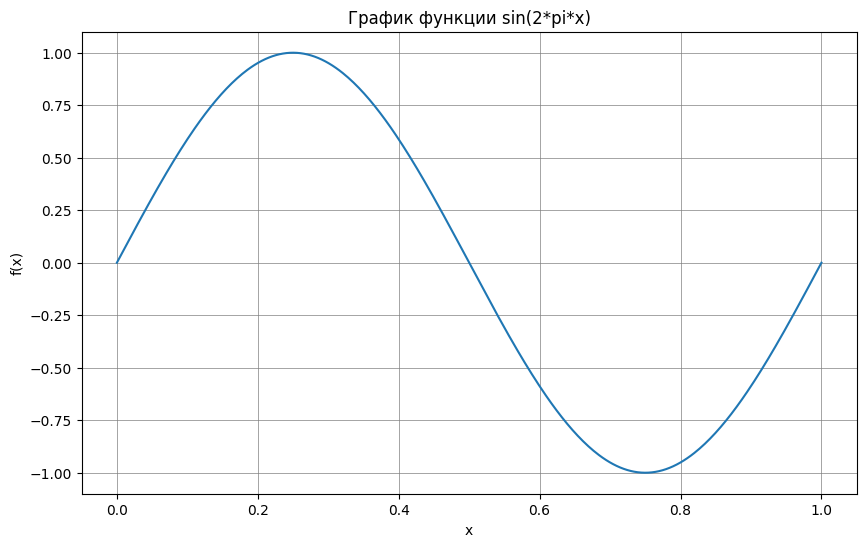

In [16]:
import numpy as np
import matplotlib.pyplot as plt

x_values = np.linspace(0, 1, 400)
y_values = f(x_values)

plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('График функции sin(2*pi*x)')

plt.grid(color='gray', linewidth=0.5)
plt.show()

#### 4.2. Напишите функцию, которая принимает на вход четыре параметра: expr_str, x_start, x_end и num_points. Если эти параметры не предоставлены при вызове функции (т.е. они равны None), функция запрашивает соответствующие значения у пользователя. Если параметры предоставлены, функция использует их для построения графика.

  - Значения параметров:

    - `expr_str`: Это строка, которая представляет математическое выражение, которое нужно визуализировать. Например, `"sin(2*pi*x)"`. Это выражение затем преобразуется в выражение SymPy, которое можно использовать для дальнейших вычислений.

    - `x_start`: Это начальное значение `x` для диапазона значений `x`, используемых при построении графика. Например, если `x_start = 0`, то график будет начинаться с `x = 0`.

    - `x_end`: Это конечное значение `x` для диапазона значений `x`, используемых при построении графика. Например, если `x_end = 1`, то график будет заканчиваться на `x = 1`.

    - `num_points`: Это количество точек, которые будут использоваться при построении графика. Например, если `num_points = 400`, то график будет состоять из 400 точек, равномерно распределенных между `x_start` и `x_end`.

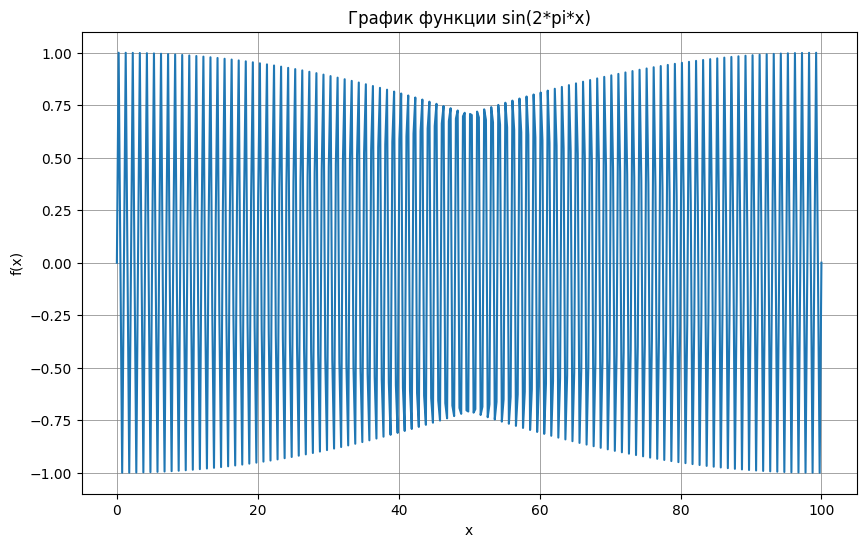

In [107]:
def visualize_func(expr_str=None, x_start=None, x_end=None, num_points=None):
  if expr_str == None:
    expr_str = input('Введите математическое выражение:')
  if x_start == None:
    x_start = int(input('Введите начальное значение x:'))
  if x_end == None:
    x_end = int(input('Введите конечное значение x:'))
  if num_points == None:
    num_points = int(input('Введите количество точек для графика'))
  expr = parse_expr(expr_str)

  f = sp.lambdify(x, expr, "numpy")
  x_values = np.linspace(x_start, x_end, num_points)
  y_values = f(x_values)
  plt.figure(figsize=(10, 6))
  plt.plot(x_values, y_values)
  plt.xlabel('x')
  plt.ylabel('f(x)')
  plt.title(f'График функции {expr_str}')

  plt.grid(color='gray', linewidth=0.5)
  plt.show()


visualize_func('sin(2*pi*x)', 0, 100, 400)

### Задание №5. Работа с физическими единицами измерения

SymPy позволяет работать с физическими единицами измерения. Подробнее об этом можно прочитать в документации SymPy:

http://docs.sympy.org/latest/modules/physics/units/quantities.html

Давайте попробуем это на практике. Второй закон Ньютона гласит:



$$F = ma$$



Создайте величину массы равную 1 кг и величину ускорения равную 10 м/с$^2$ , затем вычислите силу, $F$ (используя предопределенные единицы измерения kilograms, meters, seconds, newtons), и выразите результат в Ньютонах, используя метод convert_to.

In [33]:
from sympy.physics.units import kilogram, meter, second, newton
from sympy.physics.units import convert_to
m = 1 * kilogram
a = 10 * meter/second **2
F = m * a
Fn = convert_to(F, newton)
Fn

10*newton

### Задание №6. Решение обыкновенных дифференциальных уравнений

Найдите решение следующего уравнения:

$$ \frac{dy}{dt} = \cos(t) - y^{1/n}, \qquad y(0) = 2, $$

где $n > 1$ - целое число. Это небольшое изменение относительно предыдущих примеров означает, что `sympy` может представить решение только в виде степенного ряда.

#### 6.1. Найдите общее решение в виде степенного ряда для $n = 3$.

- Определите дифференциальное уравнение и отобразите его:

In [22]:
from sympy import Function, dsolve, cos, pprint, Eq
from sympy.abc import t, n, y
n = 3
y = Function('y')
eq = sp.Derivative(y(t), t) + y(t)**(1/n) - cos(t)
eq

y(t)**0.333333333333333 - cos(t) + Derivative(y(t), t)

- Отобразите общее решение дифференциального уравнения для $n = 3$ в виде степенного ряда:

In [23]:
sol = dsolve(Eq(eq, 0), y(t), hint='1st_power_series')
sol

Eq(y(t), t*(1 - C1**0.333333333333333) + t**3*((1 - C1**0.333333333333333)*(0.222222222222222*(1 - C1**0.333333333333333)/C1**1.66666666666667 + 0.111111111111111/C1**1.33333333333333) - 1)/6 + t**4*(0.333333333333333/C1**0.666666666666667 + (1 - C1**0.333333333333333)*(-0.333333333333333*(0.222222222222222*(1 - C1**0.333333333333333)/C1**1.66666666666667 + 0.111111111111111/C1**1.33333333333333)/C1**0.666666666666667 + (1 - C1**0.333333333333333)*(-0.37037037037037*(1 - C1**0.333333333333333)/C1**2.66666666666667 - 0.222222222222222/C1**2.33333333333333)))/24 + t**5*(-0.666666666666667*(1 - C1**0.333333333333333)/C1**1.66666666666667 - 0.111111111111111/C1**1.33333333333333 + (1 - C1**0.333333333333333)*(-0.222222222222222/C1**1.66666666666667 - 0.333333333333333*(-0.333333333333333*(0.222222222222222*(1 - C1**0.333333333333333)/C1**1.66666666666667 + 0.111111111111111/C1**1.33333333333333)/C1**0.666666666666667 + (1 - C1**0.333333333333333)*(-0.37037037037037*(1 - C1**0.3333333333333

#### 6.2. Изучив [документацию](https://docs.sympy.org/latest/modules/solvers/ode.html) (метод `dsolve`), укажите начальное условие $y(0) = 2$ с помощью параметра `ics`. Используя данное условие, найдите решения ОДУ для $n = 3, \dots, 10$.

In [111]:
for n in range(3, 11):
    eq = sp.Derivative(y(t), t) + y(t)**(1/n) - cos(t)
    sol = dsolve(Eq(eq, 0), y(t), hint='1st_power_series', ics={y(0): 2})
    print(f'Решение для n = {n}:')
    display(sol)

Решение для n = 3:


Eq(y(t), 2 - 0.259921049894873*t + 0.0272900001727772*t**2 - 0.167788708593124*t**3 + 0.00872690909335191*t**4 + 0.00857477013656389*t**5 + O(t**6))

Решение для n = 4:


Eq(y(t), 2 - 0.189207115002721*t + 0.0140629029606484*t**2 - 0.167030887515215*t**3 + 0.00618400752000714*t**4 + 0.0085011856656446*t**5 + O(t**6))

Решение для n = 5:


Eq(y(t), 2 - 0.148698354997035*t + 0.00854047778879297*t**2 - 0.166824353759818*t**3 + 0.00478184877283554*t**4 + 0.00845122695046389*t**5 + O(t**6))

Решение для n = 6:


Eq(y(t), 2 - 0.122462048309373*t + 0.00572745839939584*t**2 - 0.166747829812517*t**3 + 0.00389523542501292*t**4 + 0.00841955181737363*t**5 + O(t**6))

Решение для n = 7:


Eq(y(t), 2 - 0.104089513673812*t + 0.00410443359038082*t**2 - 0.166713530740684*t**3 + 0.00328476949521276*t**4 + 0.00839878736214259*t**5 + O(t**6))

Решение для n = 8:


Eq(y(t), 2 - 0.0905077326652577*t + 0.00308435569804573*t**2 - 0.166696029321922*t**3 + 0.00283914676202468*t**4 + 0.00838458837063094*t**5 + O(t**6))

Решение для n = 9:


Eq(y(t), 2 - 0.0800597388923061*t + 0.00240192501899473*t**2 - 0.166686219307222*t**3 + 0.00249968805439066*t**4 + 0.00837450098042692*t**5 + O(t**6))

Решение для n = 10:


Eq(y(t), 2 - 0.0717734625362931*t + 0.00192312231151855*t**2 - 0.166680314818901*t**3 + 0.00223256501781801*t**4 + 0.00836709725670678*t**5 + O(t**6))

#### 6.3. Постройте график каждого из этих решений для $t \in [0, 1]$:

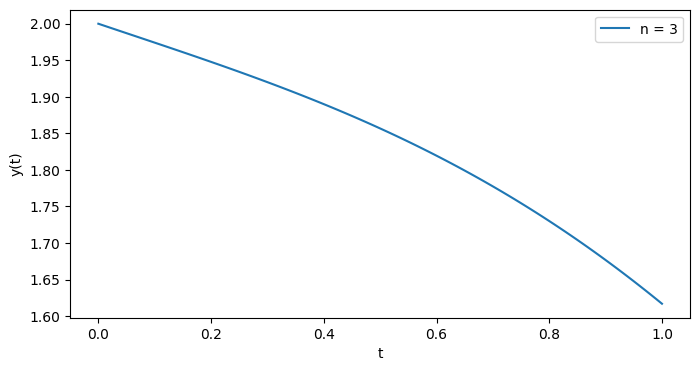

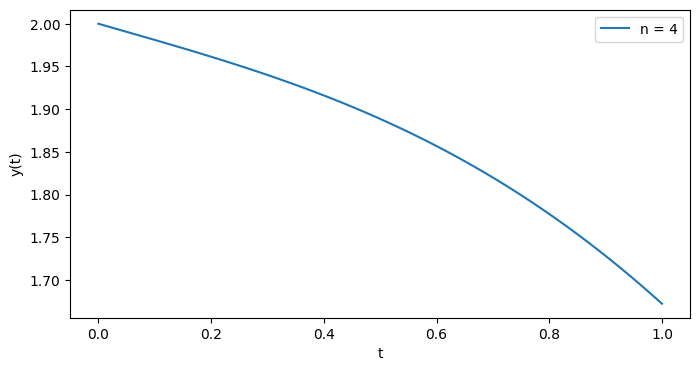

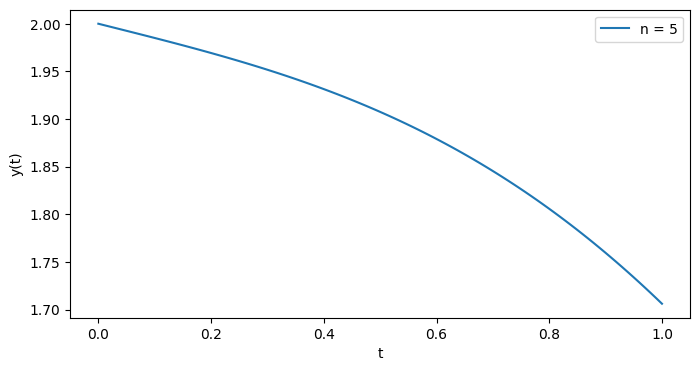

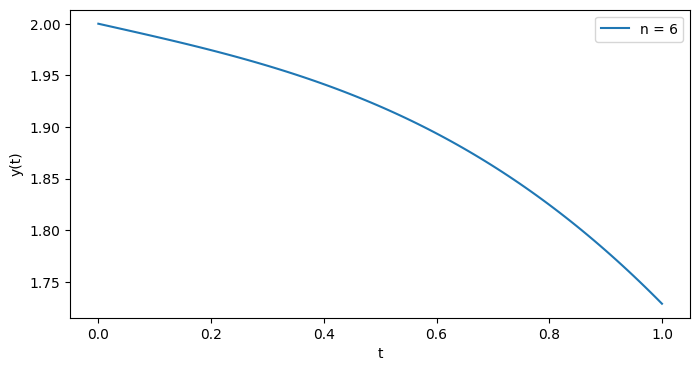

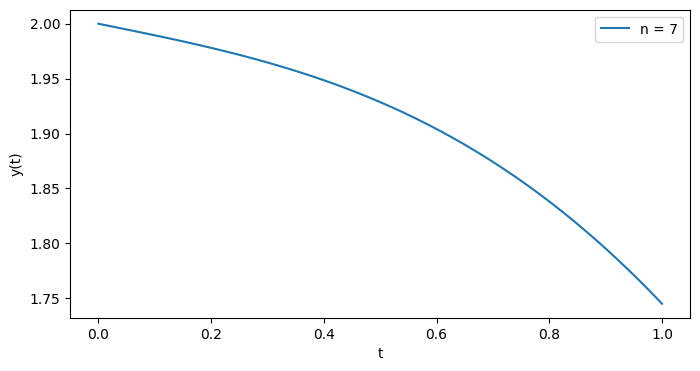

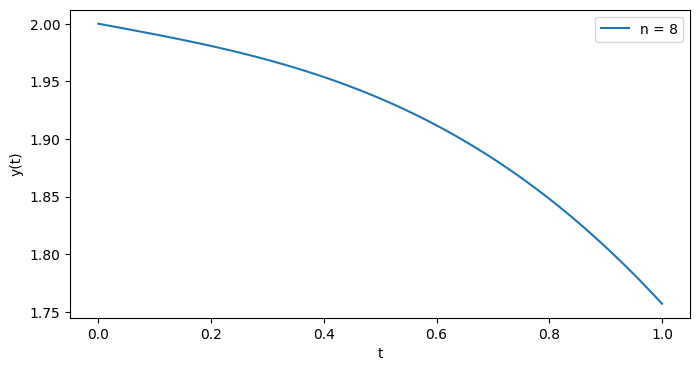

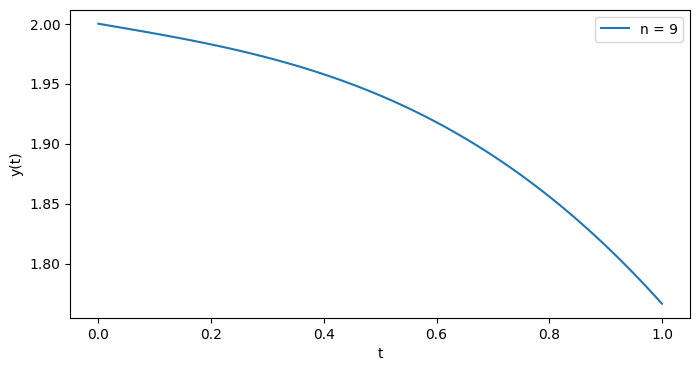

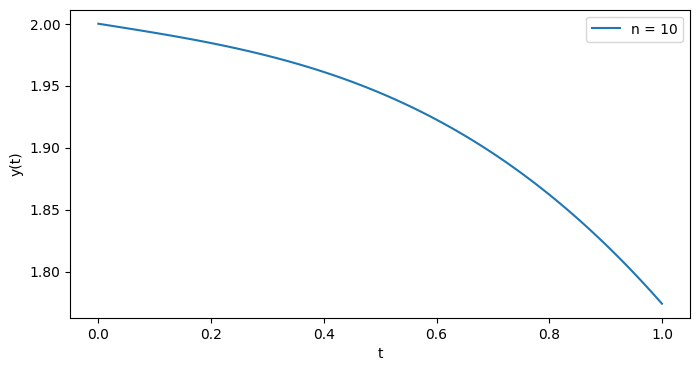

In [20]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

t = sp.symbols('t')
y = sp.Function('y')


for n in range(3, 11):
    fun = sp.Derivative(y(t), t) + y(t)**(1/n) - sp.cos(t)
    eq = sp.Eq(fun, 0)
    sol = sp.dsolve(eq, y(t), hint='1st_power_series',  ics={y(0): 2})
    rhs = sol.rhs.series(t, 0, 6)
    rhs = rhs.removeO()
    f = sp.lambdify(t, rhs, "numpy")
    t_values = np.linspace(0, 1, 100)
    y_values = f(t_values)
    plt.figure(figsize=(8, 4))
    plt.plot(t_values, y_values, label=f'n = {n}')
    plt.xlabel('t')
    plt.ylabel('y(t)')
    plt.legend()
    plt.show()